In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *

ticksize = 12
labelsize = 14
titlesize = 16
dpi = 400
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

%matplotlib inline

In [3]:
random = pd.read_csv('../../models/Qscore/outputs/random_sovlent_shell_Q.csv')
random_alt = pd.read_csv('../../models/Qscore/outputs/random_sovlent_aligned_shell_Q.csv')
randhalf = pd.read_csv('../../models/Qscore/outputs/random_sovlent_shell_halfQ.csv')

In [4]:
random22 = random[random.map==2.2]
random23 = random[random.map==2.3]

randhalf22 = randhalf[randhalf.map==2.2]
randhalf23 = randhalf[randhalf.map==2.3]

In [5]:
random22

,atom_name,residue_number,residue_name,x_coord,y_coord,z_coord,Qscore,map
115979,CA,2,NaN,61.667,80.000,93.333,-0.711582,2.2
115980,CA,3,NaN,61.667,80.000,95.000,-0.057832,2.2
115981,CA,4,NaN,61.667,80.000,96.667,0.708332,2.2
115982,CA,5,NaN,61.667,81.667,93.333,-0.157908,2.2
115983,CA,6,NaN,61.667,81.667,95.000,-0.207455,2.2
...,...,...,...,...,...,...,...,...
231173,CA,496,NaN,128.333,93.333,126.667,-0.603631,2.2
231174,CA,497,NaN,128.333,93.333,128.333,-0.274002,2.2
231175,CA,498,NaN,128.333,95.000,125.000,-0.248029,2.2
231176,CA,499,NaN,128.333,95.000,126.667,-0.391499,2.2


In [7]:
MIN_Q_RES = 0.6

df22 = PandasPdb().read_pdb(PDB22_F)
df23 = PandasPdb().read_pdb(PDB23_F)

per_residue = pd.read_csv('../per_residue_comparison//per_residue_summary.csv')
per_residue22 = per_residue[per_residue['Qscore 2.2A']>MIN_Q_RES].residue_number.to_list()
per_residue23 = per_residue[per_residue['Qscore 2.3A']>MIN_Q_RES].residue_number.to_list()

df22 = df22.df["ATOM"][(df22.df["ATOM"].element_symbol!="H") & (df22.df["ATOM"].residue_number.isin(per_residue22))][['x_coord','y_coord','z_coord']]
df23 = df23.df["ATOM"][(df23.df["ATOM"].element_symbol!="H") & (df23.df["ATOM"].residue_number.isin(per_residue23))][['x_coord','y_coord','z_coord']]

def get_dist(coord,coords):
    #print(coord)
    #print(coords)
    #print((coord-coords).shape)
    #print((coord-coords).to_numpy().astype(float))
    dist = np.linalg.norm((coord-coords).to_numpy().astype(float),axis=1)
    min_dist = dist.min()
    return min_dist
    #print(min_dist)
random22['dist_resolved_residue'] = random22.apply(lambda row: get_dist(row[['x_coord','y_coord','z_coord']],df22), axis=1)
random23['dist_resolved_residue'] = random23.apply(lambda row: get_dist(row[['x_coord','y_coord','z_coord']],df23), axis=1)

/tmp/ipykernel_123788/2328539147.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random22['dist_resolved_residue'] = random22.apply(lambda row: get_dist(row[['x_coord','y_coord','z_coord']],df22), axis=1)
/tmp/ipykernel_123788/2328539147.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random23['dist_resolved_residue'] = random23.apply(lambda row: get_dist(row[['x_coord','y_coord','z_coord']],df23), axis=1)


In [8]:
random22 = random22[random22['dist_resolved_residue']<3.5]
random23 = random23[random23['dist_resolved_residue']<3.5]

In [9]:
get_mapvalue = get_density_interpolator(MRC23_F)

mapvalue23_rand = []
for k in tqdm(range(len(random23))):
    current_atom = random23.iloc[k]
    atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()

    coord = np.array(atom_coord)
    mapvalue23_rand.append(get_mapvalue(coord)[0])
    
get_mapvalue = get_density_interpolator(MRC22_F)

mapvalue22_rand = []
for k in tqdm(range(len(random22))):
    current_atom = random22.iloc[k]
    atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()

    coord = np.array(atom_coord)
    mapvalue22_rand.append(get_mapvalue(coord)[0])

100%|██████████████████████████████████████████████████████████████████████████| 89472/89472 [01:37<00:00, 919.33it/s]


In [10]:
random22['mapvalue'] = mapvalue22_rand
random23['mapvalue'] = mapvalue23_rand
random = pd.concat([random22,random23])

/tmp/ipykernel_123788/755595624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random22['mapvalue'] = mapvalue22_rand


In [11]:
print((random[random.map==2.3].Qscore>SWIM_QSCORE_23).mean())
print((randhalf[randhalf.map==2.3].QscoreA>SWIM_QSCORE_23).mean())
print((randhalf[randhalf.map==2.3].QscoreB>SWIM_QSCORE_23).mean())
print((random[random.map==2.3].mapvalue>SWIM_MAPVALUE).mean())
print(((random[random.map==2.3].Qscore>SWIM_QSCORE_23) & (random[random.map==2.3].mapvalue>SWIM_MAPVALUE)).mean())
print(((randhalf[randhalf.map==2.3].QscoreA>SWIM_QSCORE_23) & (randhalf[randhalf.map==2.3].QscoreB>SWIM_QSCORE_23)).mean())
print(((random[random.map==2.3].Qscore>SWIM_QSCORE_23) & (random[random.map==2.3].mapvalue>SWIM_MAPVALUE) & (randhalf[randhalf.map==2.3].QscoreA>SWIM_QSCORE_23) & (randhalf[randhalf.map==2.3].QscoreB>SWIM_QSCORE_23)).mean())

print((random[random.map==2.2].Qscore>SWIM_QSCORE_22).mean())
print((randhalf[randhalf.map==2.2].QscoreA>SWIM_QSCORE_22).mean())
print((randhalf[randhalf.map==2.2].QscoreB>SWIM_QSCORE_22).mean())
print((random[random.map==2.2].mapvalue>SWIM_MAPVALUE).mean())
print(((random[random.map==2.2].Qscore>SWIM_QSCORE_22) & (random[random.map==2.2].mapvalue>SWIM_MAPVALUE)).mean())
print(((randhalf[randhalf.map==2.2].QscoreA>SWIM_QSCORE_22) & (randhalf[randhalf.map==2.2].QscoreB>SWIM_QSCORE_22)).mean())
print(((random[random.map==2.2].Qscore>SWIM_QSCORE_22) & (random[random.map==2.2].mapvalue>SWIM_MAPVALUE) & (randhalf[randhalf.map==2.2].QscoreA>SWIM_QSCORE_22) & (randhalf[randhalf.map==2.2].QscoreB>SWIM_QSCORE_22)).mean())
'''
0.04508574828201657
0.04519783753955457
0.04508574828201657
0.18724941584252322
0.019158640788418592
0.018494727493770423
0.01339897740108123
0.0288283752463129
0.02337693903592913
0.019722393423554023
0.12015729303205756
0.012439344091528573
0.00810770926830962
0.006224012361218413
'''

0.023926622024646897
0.02157287095077557
0.02158149320135542
0.1642788813235046
0.014844409431095605
0.007699669767802792
0.005518240371101665
0.026142256795422033
0.02337693903592913
0.019722393423554023
0.1537464234620887
0.01570323676680973
0.00810770926830962
0.0053993524249342445


'\n0.04508574828201657\n0.04519783753955457\n0.04508574828201657\n0.18724941584252322\n0.019158640788418592\n0.018494727493770423\n0.01339897740108123\n0.0288283752463129\n0.02337693903592913\n0.019722393423554023\n0.12015729303205756\n0.012439344091528573\n0.00810770926830962\n0.006224012361218413\n'

15.374642346208873
16.42788813235046
2.337693903592907
2.1581493201355357
1.972239342355408
2.3926622024646917
2.6142256795422014
16.42788813235046
15.374642346208873


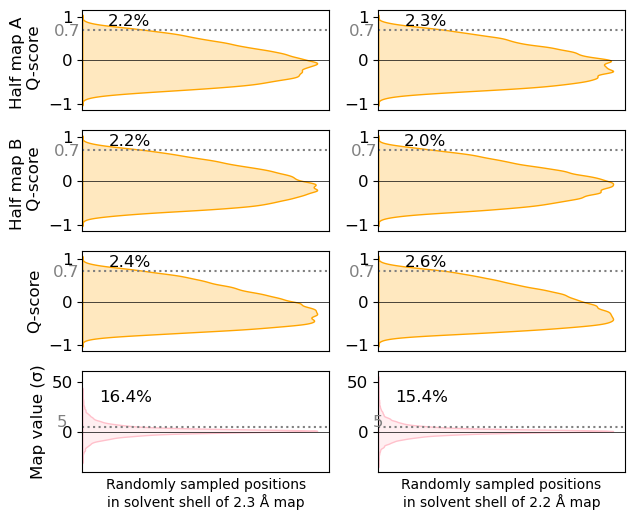

In [14]:
from scipy.stats import percentileofscore
fig,ax = plt.subplots(4,2,figsize=(7,6),sharey='row')

g=sns.kdeplot(data=randhalf[randhalf.map==2.3],y="QscoreA",fill=True,ax=ax[0,0],color='orange')
ymin,ymax = g.get_xlim()
ax[0,0].hlines(0.7,ymin,ymax,'grey',':')
ax[0,0].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
g=sns.kdeplot(data=randhalf[randhalf.map==2.2],y="QscoreA",fill=True,ax=ax[0,1],color='orange')
ymin,ymax = g.get_xlim()
ax[0,1].hlines(0.7,ymin,ymax,'grey',':')
ax[0,1].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
ax[0,0].set_ylabel('Half map A \n Q-score',size=12)
ax[0,1].set_ylabel('Half map A \n Q-score',size=12)
ax[0,0].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[0,1].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[0,0].xaxis.set_ticks([])
ax[0,1].xaxis.set_ticks([])
ax[0,1].set_xlabel('',size=10)
ax[0,0].set_xlabel('',size=10)

g=sns.kdeplot(data=randhalf[randhalf.map==2.3],y="QscoreB",fill=True,ax=ax[1,0],color='orange')
ymin,ymax = g.get_xlim()
ax[1,0].hlines(0.7,ymin,ymax,'grey',':')
ax[1,0].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
g=sns.kdeplot(data=randhalf[randhalf.map==2.2],y="QscoreB",fill=True,ax=ax[1,1],color='orange')
ymin,ymax = g.get_xlim()
ax[1,1].hlines(0.7,ymin,ymax,'grey',':')
ax[1,1].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
ax[1,0].set_ylabel('Half map B \n Q-score',size=12)
ax[1,1].set_ylabel('Half map B \n Q-score',size=12)
ax[1,0].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[1,1].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[1,0].xaxis.set_ticks([])
ax[1,1].xaxis.set_ticks([])
ax[1,1].set_xlabel('',size=10)
ax[1,0].set_xlabel('',size=10)

g=sns.kdeplot(data=random[random.map==2.3],y="Qscore",fill=True,ax=ax[2,0],color='orange')
ymin,ymax = g.get_xlim()
ax[2,0].hlines(0.7,ymin,ymax,'grey',':')
ax[2,0].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
g=sns.kdeplot(data=random[random.map==2.2],y="Qscore",fill=True,ax=ax[2,1],color='orange')
ymin,ymax = g.get_xlim()
ax[2,1].hlines(0.7,ymin,ymax,'grey',':')
ax[2,1].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
ax[2,0].set_ylabel('Q-score',size=12)
ax[2,1].set_ylabel('Q-score',size=12)
ax[2,0].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[2,1].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[2,0].xaxis.set_ticks([])
ax[2,1].xaxis.set_ticks([])
ax[2,1].set_xlabel('',size=10)
ax[2,0].set_xlabel('',size=10)


g=sns.kdeplot(data=random[random.map==2.3],y="mapvalue",fill=True,ax=ax[3,0],color='pink')
ymin,ymax = g.get_xlim()
ax[3,0].hlines(5,ymin,ymax,'grey',':')
ax[3,0].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
g=sns.kdeplot(data=random[random.map==2.2],y="mapvalue",fill=True,ax=ax[3,1],color='pink')
ymin,ymax = g.get_xlim()
ax[3,1].hlines(5,ymin,ymax,'grey',':')
ax[3,1].hlines(0,ymin,ymax,'black',linewidth=0.5)
g.set_xlim(ymin,ymax)
ax[3,0].set_ylabel('Map value (σ)',size=12)
ax[3,1].set_ylabel('Map value (σ)',size=12)
ax[3,0].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[3,1].yaxis.set_tick_params(which='both', labelbottom=True,labelsize=12)
ax[3,0].xaxis.set_ticks([])
ax[3,1].xaxis.set_ticks([])
ax[3,1].set_xlabel('Randomly sampled positions\nin solvent shell of 2.2 Å map',size=10)
ax[3,0].set_xlabel('Randomly sampled positions\nin solvent shell of 2.3 Å map',size=10)
print(100-percentileofscore(random[random.map==2.2].mapvalue,5))
print(100-percentileofscore(random[random.map==2.3].mapvalue,5))

print(100-percentileofscore(randhalf[randhalf.map==2.2].QscoreA,0.7))

print(100-percentileofscore(randhalf[randhalf.map==2.3].QscoreB,0.7))
print(100-percentileofscore(randhalf[randhalf.map==2.2].QscoreB,0.7))

print(100-percentileofscore(random[random.map==2.3].Qscore,0.7))
print(100-percentileofscore(random[random.map==2.2].Qscore,0.7))

print(100-percentileofscore(random[random.map==2.3].mapvalue,5))
print(100-percentileofscore(random[random.map==2.2].mapvalue,5))

ax[0,0].text(0.1,0.8,f'{round(100-percentileofscore(randhalf[randhalf.map==2.3].QscoreA,0.7),1)}%',size=12)
ax[0,1].text(0.1,0.8,f'{round(100-percentileofscore(randhalf[randhalf.map==2.2].QscoreA,0.7),1)}%',size=12)
ax[1,0].text(0.1,0.8,f'{round(100-percentileofscore(randhalf[randhalf.map==2.3].QscoreB,0.7),1)}%',size=12)
ax[1,1].text(0.1,0.8,f'{round(100-percentileofscore(randhalf[randhalf.map==2.2].QscoreB,0.7),1)}%',size=12)
ax[2,0].text(0.1,0.8,f'{round(100-percentileofscore(random[random.map==2.3].Qscore,0.7),1)}%',size=12)
ax[2,1].text(0.1,0.8,f'{round(100-percentileofscore(random[random.map==2.2].Qscore,0.7),1)}%',size=12)
ax[3,0].text(0.01,30,f'{round(100-percentileofscore(random[random.map==2.3].mapvalue,5),1)}%',size=12)
ax[3,1].text(0.01,30,f'{round(100-percentileofscore(random[random.map==2.2].mapvalue,5),1)}%',size=12)


ax[3,0].text(-0.015,5,'5',size=12,color='grey')
ax[3,1].text(-0.0035,5,'5',size=12,color='grey')
ax[0,0].text(-0.11,0.57,'0.7',size=12,color='grey')
ax[0,1].text(-0.11,0.57,'0.7',size=12,color='grey')
ax[1,0].text(-0.11,0.57,'0.7',size=12,color='grey')
ax[1,1].text(-0.11,0.57,'0.7',size=12,color='grey')
ax[2,0].text(-0.11,0.57,'0.7',size=12,color='grey')
ax[2,1].text(-0.11,0.57,'0.7',size=12,color='grey')


plt.savefig("Suppl_rand_graphs.png",dpi=dpi, bbox_inches="tight")
plt.savefig("Suppl_rand_graphs.svg", bbox_inches="tight")

In [15]:
random["Qscore_alt"] = random_alt.Qscore
# TODO note if doing alt, will actually need to redo Q for 2.3A

<AxesSubplot:xlabel='Qscore', ylabel='Qscore_alt'>

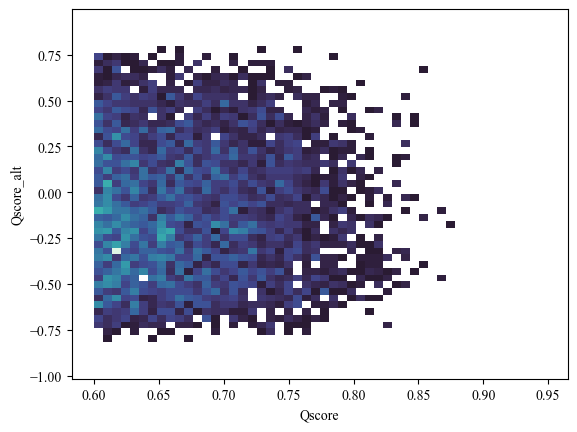

In [26]:
sns.histplot(data=random[random["Qscore"]>0.60],x="Qscore",y="Qscore_alt", bins=50, pthresh=.1, cmap="mako")

<AxesSubplot:xlabel='Qscore', ylabel='Qscore_alt'>

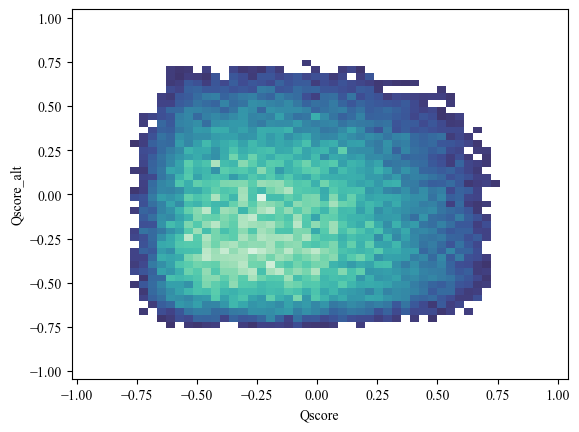

In [17]:
sns.histplot(data=random[random["Qscore_alt"]!=0],x="Qscore",y="Qscore_alt", bins=50, pthresh=.1, cmap="mako")

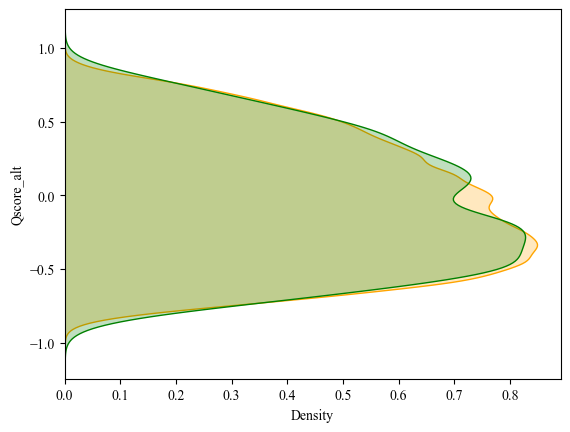

In [18]:
g=sns.kdeplot(data=random[random.map==2.3],y="Qscore_alt",fill=True,color='orange')
g=sns.kdeplot(data=random[(random.map==2.3) & (random.Qscore>0.7)],y="Qscore_alt",fill=True,color='green')


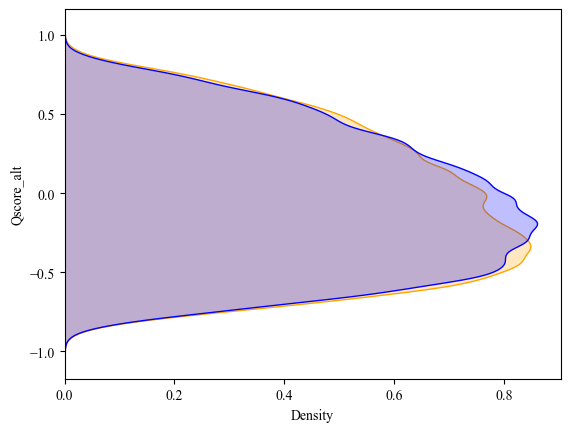

In [19]:
g=sns.kdeplot(data=random[random.map==2.3],y="Qscore_alt",fill=True,color='orange')
g=sns.kdeplot(data=random[random.map==2.3],y="Qscore",fill=True,color='blue')


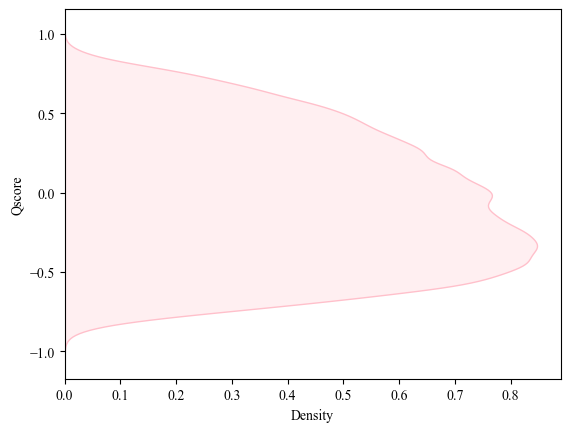

In [21]:
g=sns.kdeplot(data=random_alt[random_alt.map==2.3],y="Qscore",fill=True,color='pink')
